# PCA

In [2]:
# Manejo de archivos
import os
from pathlib import Path

# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

## Cargar datos

In [4]:
print(f"Current path: {os.getcwd()}")

# Definir la ruta de los datos
data_path: Path = Path(r"../data/raw")
if not data_path.exists():
    print(f"Path {data_path} does not exits.")

# Imprimir archivos en la carpeta de datos
print(list(data_path.glob("*")))

Current path: c:\Personal\Maestría en Ciencia de Datos\Asignaturas\06 - Aprendizaje Automático Aplicado\Proyecto Final\_GitHub (Trabajo Local)\notebooks
[WindowsPath('../data/raw/datos_molienda (copy).parquet'), WindowsPath('../data/raw/datos_molienda.parquet'), WindowsPath('../data/raw/df_model.parquet')]


In [5]:
df = pd.read_parquet(data_path / "df_model.parquet")

In [6]:
df.shape

(221771, 28)

In [7]:
df.head()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
date,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00,75.761031,38829.984689,73.39844,78.362584,65.777186,73.931659,15.788181,64.260113,99.98547,99.93459,...,29.857760,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.045367,91.875140,88.832868
2022-11-15 00:00:10,75.761031,38801.377137,72.96875,78.673050,65.561138,74.949818,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.043414,92.364275,89.271139
2022-11-15 00:00:20,75.761031,38168.832363,72.57031,78.973500,64.127962,75.815971,15.428343,64.260113,99.99471,99.97040,...,30.130893,39.063374,66.040209,94.815049,54.50695,5.75307,64.40281,0.041364,93.021432,89.849212
2022-11-15 00:00:30,75.761031,39007.987239,72.55859,78.973500,63.999458,75.815971,14.517244,64.260113,99.99471,99.97040,...,30.130893,35.656382,66.040209,94.815049,54.50695,5.75307,64.40281,0.039330,92.073034,89.613041
2022-11-15 00:00:40,75.684350,38731.447564,72.55859,79.223876,66.060989,75.815971,14.517244,64.260113,99.99544,99.97289,...,28.725894,35.479188,66.040209,94.815049,54.50695,5.75307,64.40281,0.037073,92.166380,89.520688


## Data exploration
### Checking for outliers

In [8]:
df.describe()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
count,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,...,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000,221771.000000
mean,69.765735,37023.943501,74.878159,72.173701,59.197456,59.880275,10.351164,44.883381,99.957466,99.885531,...,27.918859,38.949626,36.910137,91.879836,50.575848,2.126756,40.881584,44.118646,91.632154,88.440976
std,6.865134,4581.945498,4.890440,10.901352,9.596722,14.777813,5.690148,17.401965,0.754114,0.807605,...,4.232020,14.223759,22.886103,12.128958,15.178924,2.963290,22.560972,29.536459,2.388575,3.691925
min,1.149050,162.109465,-111.730500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.572027,34592.888292,73.353520,65.042604,54.980977,50.587736,6.235750,31.352605,99.974730,99.890340,...,24.896269,28.694984,16.899094,94.204228,43.609007,0.193924,21.487119,20.564673,90.183705,86.190898
50%,72.237523,38302.334275,75.726560,71.772699,61.329363,58.871709,10.439497,44.776038,99.997020,99.980230,...,27.771380,36.976656,34.958286,94.899204,50.481113,1.163542,45.667447,32.046607,91.647375,88.448381
75%,75.684350,40343.006358,77.603520,81.056625,65.402993,68.804218,13.573028,55.990689,99.999710,99.996860,...,30.851891,48.484241,58.562936,95.602374,58.419725,3.232062,59.718970,77.608569,93.181988,90.846939
max,75.914385,45390.650079,133.496100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


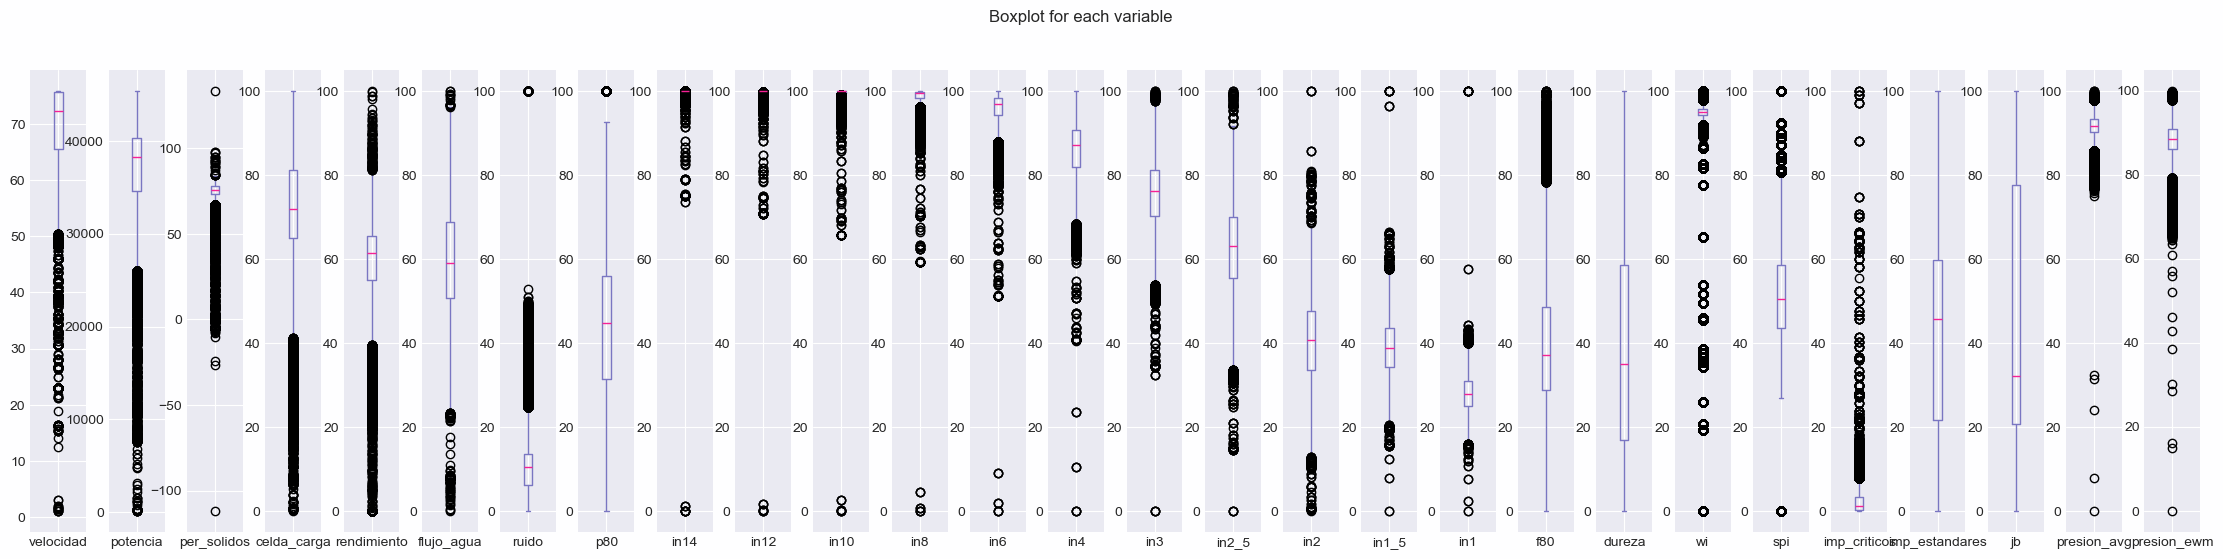

In [9]:
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(28, 6)
)
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Boxplot for each variable")
plt.show()

The presence of some significantly skewed points can be observed; however, these are not outliers, as they are part of a realistic operation of the mill.

## Data preprocessing

Let's preprocess our data to ensure PCA works correctly. In this case, we'll use StandardScaler.

### Aplying StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit scaler with our data
scaler.fit(df)

# Transform our data
scaled_features = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_features, 
                                     index=df.index,
                                     columns=df.columns)

df_scaled.head()

,velocidad,potencia,per_solidos,celda_carga,rendimiento,flujo_agua,ruido,p80,in14,in12,...,in1,f80,dureza,wi,spi,imp_criticos,imp_estandares,jb,presion_avg,presion_ewm
date,,,,,,,,,,,,,,,,,,,,,
2022-11-15 00:00:00,0.873298,0.394166,-0.302574,0.567718,0.685624,0.950845,0.955516,1.113482,0.037135,0.060747,...,0.458151,0.007997,1.272831,0.242001,0.258985,1.223749,1.042565,-1.492169,0.101729,0.106149
2022-11-15 00:00:10,0.873298,0.387922,-0.390438,0.596198,0.663111,1.019743,0.892277,1.113482,0.049388,0.105088,...,0.522691,0.007997,1.272831,0.242001,0.258985,1.223749,1.042565,-1.492235,0.306510,0.224860
2022-11-15 00:00:20,0.873298,0.249870,-0.471911,0.623759,0.513771,1.078355,0.892277,1.113482,0.049388,0.105088,...,0.522691,0.007997,1.272831,0.242001,0.258985,1.223749,1.042565,-1.492304,0.581636,0.381438
2022-11-15 00:00:30,0.873298,0.433014,-0.474308,0.623759,0.500381,1.078355,0.732158,1.113482,0.049388,0.105088,...,0.522691,-0.231532,1.272831,0.242001,0.258985,1.223749,1.042565,-1.492373,0.184579,0.317468
2022-11-15 00:00:40,0.862129,0.372660,-0.474308,0.646726,0.715197,1.078355,0.732158,1.113482,0.050356,0.108171,...,0.190698,-0.243989,1.272831,0.242001,0.258985,1.223749,1.042565,-1.492449,0.223659,0.292453


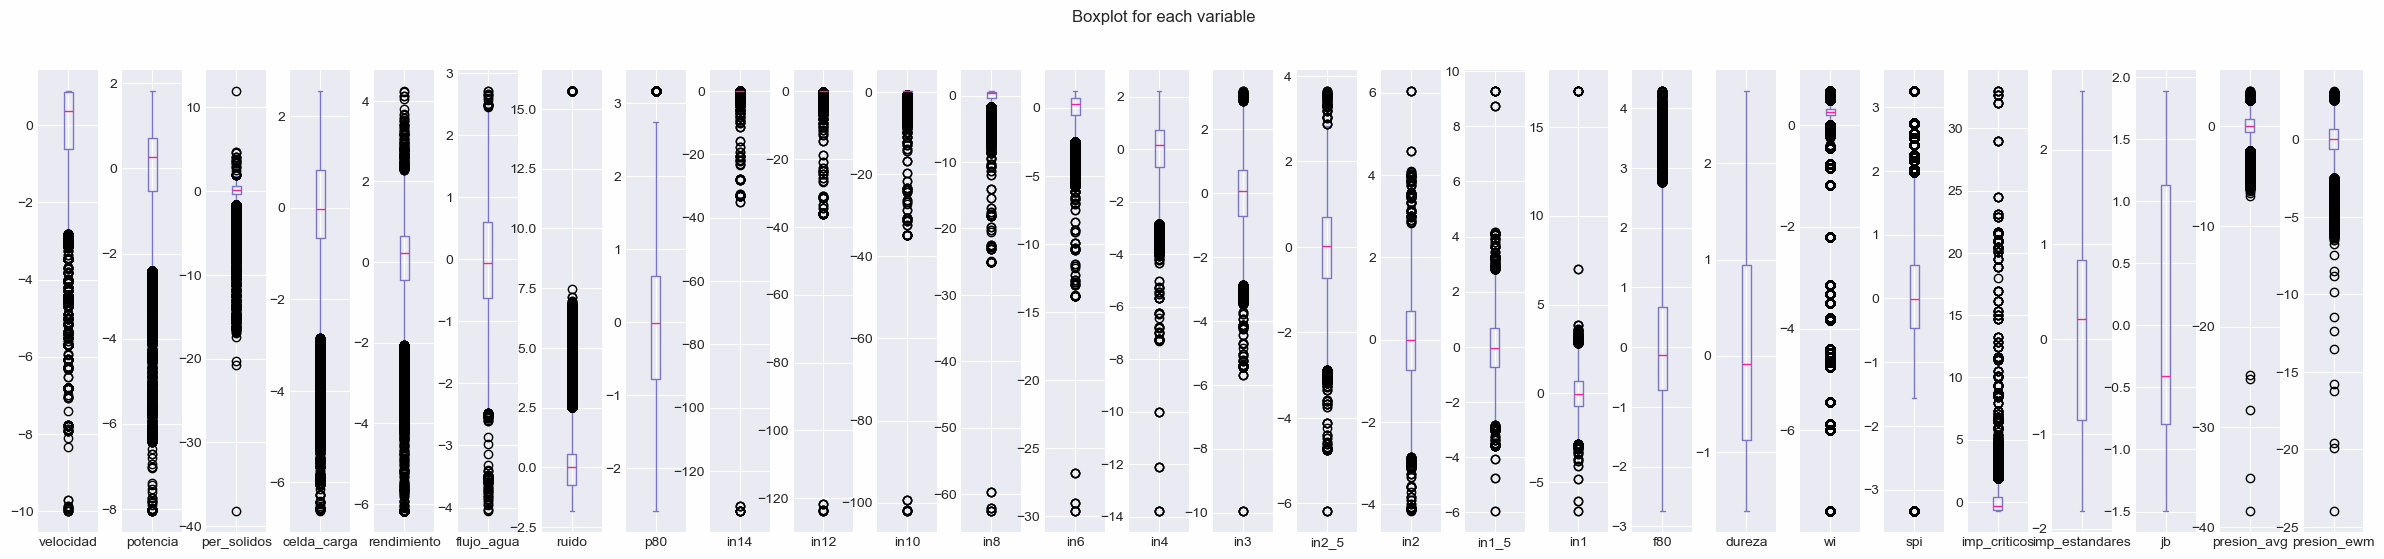

In [11]:
df_scaled.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(30, 6)
)
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.suptitle("Boxplot for each variable")
plt.show()

The scale of our data has changed. Now let's apply PCA to see how the components explain the dataset's variability, and check if we notice any interesting patterns.

In [12]:
from sklearn.decomposition import PCA

var_ratio = []
nums = (1,2,3,4,5,6,7,8,9,10)
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(df_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

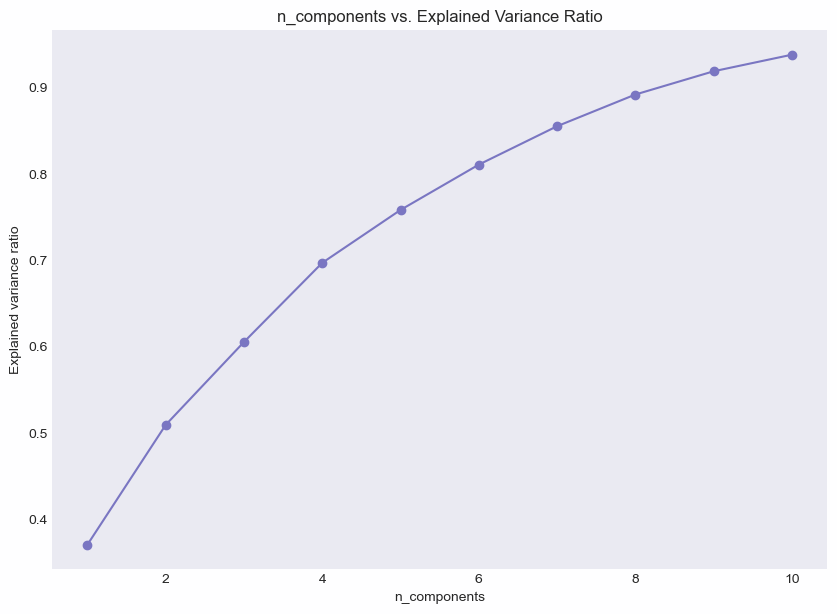

In [13]:
plt.figure(figsize=(10,7))
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.grid()
plt.show()

In [14]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(df_scaled)

PCA(n_components=2)

In [15]:
df_pca = pca.transform(df_scaled)
print(f"Explained variance using 2 components: {np.sum(pca.explained_variance_ratio_):.4f}")

Explained variance using 2 components: 0.5096


Although two components only explain 50% of our variance, this number of components allows us to visualize something in two dimensions.

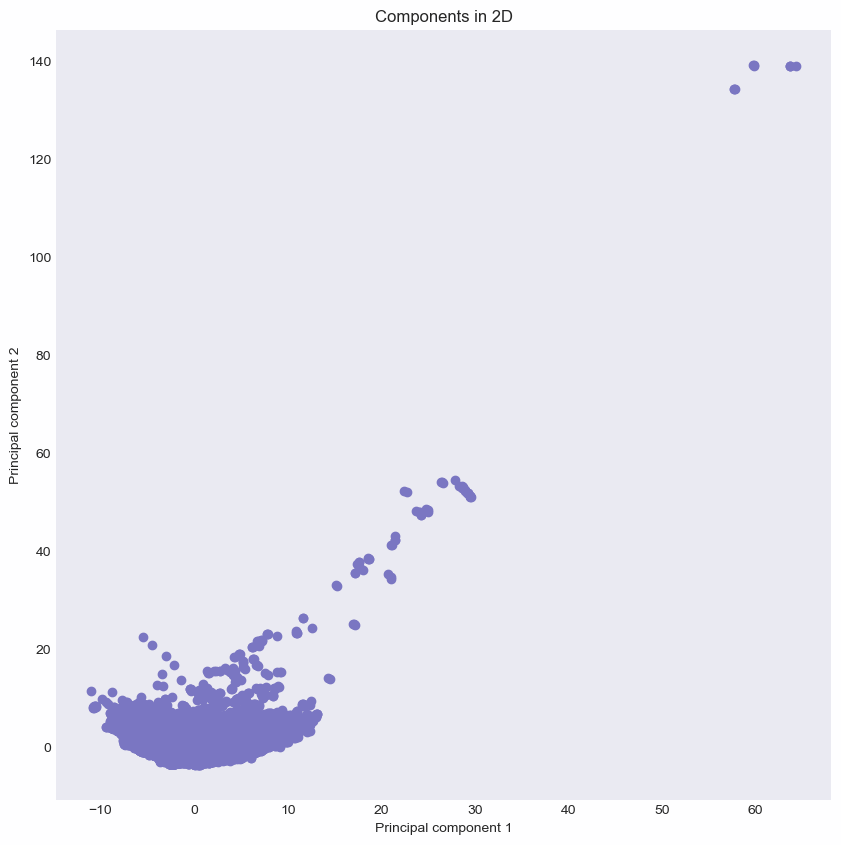

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Components in 2D')
plt.grid()
plt.show()

Not much can be said about the results, other than pointing out that there are some data points that are significantly distant from the main cluster.

Visualizando la contribución de las variables a los componentes principales...

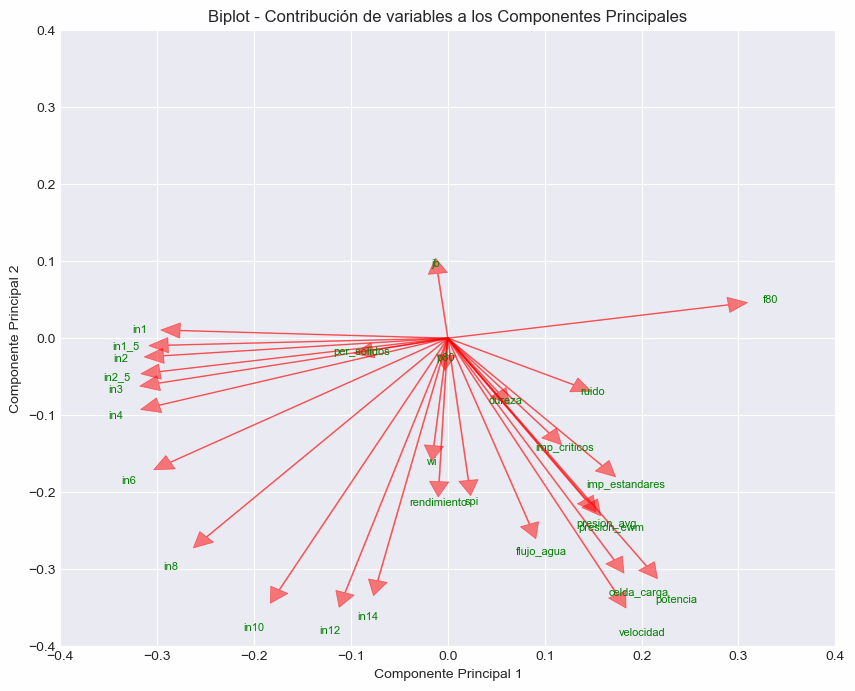

In [17]:
# Crear un DataFrame con los resultados del PCA...
columns = ["PCA1", "PCA2"]

# Visualizar la contribución de cada variable a los componentes principales
loadings = pca.components_
loadings_df = pd.DataFrame(data=loadings.T, columns=columns, index=df_scaled.columns)

# Graficando...
plt.figure(figsize=(10, 8))
for i in range(len(loadings_df)):
    plt.arrow(0, 0, loadings_df.iloc[i, 0], loadings_df.iloc[i, 1], color='r', alpha=0.5, linewidth=0.5, head_width=0.02, head_length=0.02)
    plt.text(loadings_df.iloc[i, 0]*1.15, loadings_df.iloc[i, 1]*1.15, df_scaled.columns[i], color='g', ha='center', va='center', fontsize=8)

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Biplot - Contribución de variables a los Componentes Principales')
plt.grid(True)
plt.show()